# Bellabeat Case Study (Sheets, SQL, Tableau)
#### Jessie Lin 9 June 2025


### Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart divide market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

## Ask

### Business Task
Analyze smart device usage data to gain insight on how consumers use non-Bellabeat smart devices in order to find new opportunities for the Bellabeat business to grow in the smart device market. 

### Key Stakeholders
* Urška Sršen: Bellabeat cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of Bellabeat executive team

### Analysis Questions
Three questions to guide the future marketing program:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


## Prepare

### Data Source
[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) is public data made available through [Mobius](https://www.kaggle.com/arashnic) on Kaggle.com under CC0: Public Domain, and it will be used in this case study analysis for Bellabeat. FitBit Fitness Tracker is a well known fitness smart device, and the open access to the data makes this a credible source for analysis. 

### Data Summary
This dataset was generated with responses to a survey distributed by Amazon Mechanical Turk between March 12, 2016 and May 12, 2016. Thirty-three eligible FitBit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents different uses of Fitbit trackers and individual tracking behaviors / preferences. For this analysis, data collected from April 12, 2016 to May 16, 2016 will be used, as it is more comprehensive. 


### Data Organization
There’s 18 files total in the data set for April 12, 2016 to May 16, 2016, and the following were used: 
* dailyActivity_merged - Includes data on the activity date, total steps, total distance traveled and tracked, number of logged activities, very active, moderately active, light active, and sedentary distance and time traveled, and amount of calories burned.
* dailyIntensities_merged - Includes data on the activity date, and sedentary, lightly active, daily active, and very active distance and time. 
* dailyCalories_merged - Includes data on calories burned per day.
* hourlyCalories_merged - Includes data on calories burned per hour per day. 
* dailySteps_merged - Includes data on step total per day.
* hourlySteps_merged - Includes data on steps taken each hour per day.
* sleepDay_merged - Includes data on date, time, total sleep records, total minutes asleep, and total time in bed. 

### Data Limitation and Integrity
The FitBit Fitness Tracker Data was collected in 2016, making it outdated for current trend analysis. Using only the data for the 31 days between April 12, 201 and May 16, 2016 makes the timeframe relatively small. 

Additionally, a sample size of 30 is acceptable for the Central Limit Theorem, however a bigger sample size would be more representative of the whole population and would have a greater statistical significance (confidence level). Analysis shows there’s a sample size of 33, but there is no demographic information about the participants, which would make it hard to prove the sample size is representative of the target consumer population. It would also make it harder to find the best audience to market Bellabeat products to.


## Process

### Datasets Selected
I’ve decided to analyze the following datasets:
* dailyActivity_merged
* dailyIntensities_merged
* dailyCalories_merged
* hourlyCalories_merged
* dailySteps_merged
* hourlySteps_merged
* sleepDay_merged

### Data Cleaning
Once I unzipped the file for the month of data being analyzed, I used Google Sheets to clean the datasets. To each dataset, I completed the following: 
* Filtered the Id column to determine how many unique users were in each dataset
  * There were 33 unique Ids in each dataset except the SleepDay_merged dataset, which had 24 unique Ids. 
* Used the Remove duplicates tools
  * There were three duplicate rows found in the sleepDay_merged data, and they were removed before analysis.
* Used Split text to column tool to separate date and time, then date into day, month, and year
* Used the CONCATENATE function to reformat dates to YYYY-MM-DD
  * Date columns with the reformatted dates start with “formatted_”. 
* Formatted time to 00:00:00 for consistency
* Formatted decimal numbers to two decimal places

All columns from the original dataset were kept and any columns with changes made were named with “cleaned_” in front of the original column name. Some column names also have additional details added to the end. 

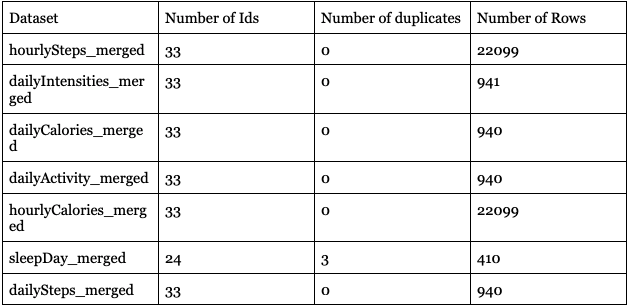
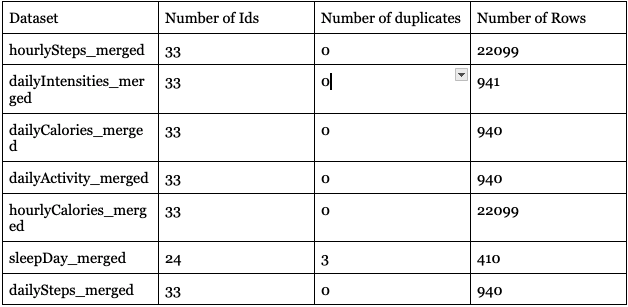

## Analyze & Share

To analyze the cleaned data files, I used Google's BigQuery. 

I noticed parallels in column names between the dailyactivity_merged dataset and dailysteps_merged, dailyintensity_merged, and dailycalories_merged datasets. I ran the following queries to confirm the data was identical and found no rows with the same ID and date had a different calories, steps, or intensity value. 

In [ ]:
SELECT dailyactivity.cleaned_calories, dailycalories.calories
FROM `first-pro-453400.Bellabeat_data.dailyactivity` dailyactivity
INNER JOIN `first-pro-453400.Bellabeat_data.dailycalories` dailycalories
ON dailyactivity.Id = dailycalories.Id AND dailyactivity.formatted_activitydate = dailycalories.formatted_activityday
WHERE dailyactivity.cleaned_calories != dailycalories.calories

In [ ]:
SELECT dailyactivity.cleaned_totalsteps, dailysteps.steptotal
FROM `first-pro-453400.Bellabeat_data.dailyactivity` dailyactivity
INNER JOIN `first-pro-453400.Bellabeat_data.dailysteps` dailysteps
ON dailyactivity.Id = dailysteps.Id AND dailyactivity.formatted_activitydate = dailysteps.formatted_activityday_date
WHERE dailyactivity.cleaned_TotalSteps != dailysteps.StepTotal;

In [ ]:
SELECT *
FROM `first-pro-453400.Bellabeat_data.dailyactivity` dailyactivity
INNER JOIN `first-pro-453400.Bellabeat_data.dailyintensities` dailyintensities
ON dailyactivity.Id = dailyintensities.Id AND dailyactivity.formatted_activitydate = dailyintensities.Formatted_ActivityDay
WHERE dailyactivity.cleaned_VeryActiveDistance != dailyintensities.cleaned_VeryActiveDistance OR 
    dailyactivity.cleaned_ModeratelyActiveDistance != dailyintensities.cleaned_ModeratelyActiveDistance OR 
    dailyactivity.cleaned_LightActiveDistance != dailyintensities.cleaned_LightActiveDistance OR 
    dailyactivity.cleaned_SedentaryActiveDistance != dailyintensities.cleaned_SedentaryActiveDistance OR 
    dailyactivity.cleaned_VeryActiveMinutes != dailyintensities.cleaned_VeryActiveMinutes OR 
    dailyactivity.cleaned_FairlyActiveMinutes != dailyintensities.cleaned_FairlyActiveMinutes OR 
    dailyactivity.cleaned_LightlyActiveMinutes != dailyintensities.cleaned_LightlyActiveMinutes OR 
    dailyactivity.cleaned_SedentaryMinutes != dailyintensities.cleaned_SedentaryMinutes;

None of the queries above returned any data, meaning the data in dailysteps_merged, dailycalories_merged, and dailyintensities_merged are also in dailyactivity_merged. With that, I proceeded my analysis with the following datasets: 
* [**dailyActivity_merged**](https://docs.google.com/spreadsheets/d/e/2PACX-1vTZ3CjdOB-fiogpOyAP7wgVr3Fm11yke2ePd0fRI-6WB-eW6xaNuMphhNFydTWrE3ZzyQupLLXuJ7qs/pubhtml)
* [**hourlyCalories_merged**](https://docs.google.com/spreadsheets/d/e/2PACX-1vScePEGCldsMMRD5jpcRTEfZUISh_aTvcDOd-6y_jfwLFw21p62eHtnt70m5Hj6SDBurVmk6joXOUIg/pubhtml)
* [**hourlySteps_merged**](https://docs.google.com/spreadsheets/d/e/2PACX-1vS4R6MIlZdJFK-2bON8fRz2fZ0daqNJkGSphZ6rsy49BoZENKek5raFZirRsl8PTIMeHrFjYdutgMu3/pubhtml)
* [**sleepDay_merged**](https://docs.google.com/spreadsheets/d/e/2PACX-1vRIWRRSxqWergHL08AJIsz_ING_y9ELYF9__ouEdIH19PTOlv_f-8o8XhJeEuugk1PNoba7XhZ2vQS-/pubhtml)
  



#### Daily Activity

Starting with the dailyactivity dataset, I wanted to know the number of records per date. 

In [ ]:
SELECT formatted_activitydate, count(Id) Number_of_Records
FROM `first-pro-453400.Bellabeat_data.dailyactivity` dailyactivity
GROUP BY dailyactivity.Formatted_ActivityDate;

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vTJVwdYnxFSNv5g8zB_DJZvxadW-7GAMpqvlo6Tcj1amYU_sTdtrspbpk0RQh4Oc6T2DwHcGb371HGU/pubhtml)

Within the 31 days from April 12, 2016 to May 12, 2016, there was a range of 21 to 33 records per day. As the month progressed, the number of records decreased. 
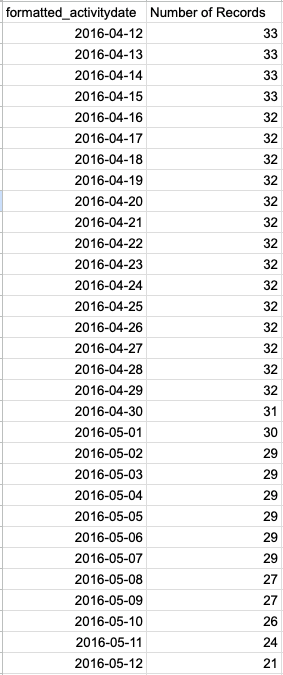

The inconsistency of wear throughout the month led me to identify each user by the number of times they wear their FitBit.

Each user was identified as one of the following: 
* Light user (<7 days/month),
* Moderate user (7-21 days/month)
* Active user (21+ days/month) 


In [ ]:
SELECT Id, count(Formatted_ActivityDate) number_record_activities, 
  CASE
  WHEN count(Formatted_ActivityDate) BETWEEN 0 AND 7 THEN 'light user'
  WHEN count(Formatted_ActivityDate) BETWEEN 7 AND 21 THEN 'moderate user'
  WHEN count(Formatted_ActivityDate) > 21 THEN 'active user'
  END AS user_type
FROM `first-pro-453400.Bellabeat_data.dailyactivity` dailyactivity
GROUP BY dailyactivity.Id
ORDER BY count(Formatted_ActivityDate);

There's a range of 4 to 31 records per user within the month.

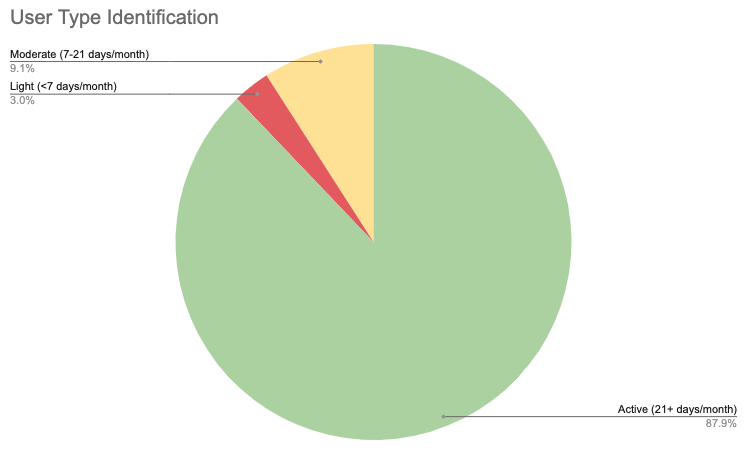
[Link to Query Results and Chart](https://docs.google.com/spreadsheets/d/e/2PACX-1vTahkrlEeQYCHF2kOkCLi0HMP7ebplBsHQy3mY0j1N8AAss-oR6sPBRR4A5NAnHcU2yEwSvkl2Z67cd/pubhtml)

87.9% of users (29 out of 33 users) were considered active users of their Fitbit, 9.1% of users (3 out of 33 users) were considered moderate users, and 3.0% of users (1 out of 33 users) were considered light users. 


I also queried the following per user (link to results are embedded): 



* [Average minutes spent actively per day](https://docs.google.com/spreadsheets/d/e/2PACX-1vT6EMwS0V4c2LqXlVPtR5sg0mjjqOr1-k3BWuSSa7OV8-QQ_VCTPWd99RT5tBXJD2WhDA9nrVLn0ZE8/pubhtml) 

In [ ]:
SELECT Id, 
  round(avg(cleaned_FairlyActiveMinutes),2) avg_fairlyactive_minutes,
  round(avg(cleaned_LightlyActiveMinutes), 2) avg_lightactive_minutes,
  round(avg(cleaned_VeryActiveMinutes),2) avg_veryactive_minutes,
  round(avg(cleaned_SedentaryMinutes),2) avg_sedentary_minutes
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY Id;

* [Min and max active distance, time, and calories](https://docs.google.com/spreadsheets/d/e/2PACX-1vQjrUdMoo5zDiTmEGqZcr0-YjliE190HHKEFzNvIshXH3IhvPykuUvYSRRrUAXu6kjyAwl6b666dSY_/pubhtml)

In [ ]:
SELECT id,
  round(min(cleaned_FairlyActiveMinutes),2) min_fairlyactive_minutes,
  round(max(cleaned_FairlyActiveMinutes),2) max_fairlyactive_minutes,
  round(min(cleaned_LightlyActiveMinutes), 2) min_lightactive_minutes,
  round(max(cleaned_LightlyActiveMinutes), 2) max_lightactive_minutes,
  round(min(cleaned_VeryActiveMinutes),2) min_veryactive_minutes,
  round(max(cleaned_VeryActiveMinutes),2) max_veryactive_minutes,
  round(min(cleaned_SedentaryMinutes),2) min_sedentary_minutes,
  round(max(cleaned_SedentaryMinutes),2) max_sedentary_minutes,
  round(min(cleaned_ModeratelyActiveDistance),2) min_moderatelyactive_distance,
  round(max(cleaned_ModeratelyActiveDistance),2) max_moderatelyactive_distance,
  round(min(cleaned_LightActiveDistance), 2) min_lightactive_distance,
  round(max(cleaned_LightActiveDistance), 2) max_lightactive_distance,
  round(min(cleaned_VeryActiveDistance),2) min_veryactive_distance,
  round(max(cleaned_VeryActiveDistance),2) max_veryactive_distance,
  round(min(cleaned_SedentaryActiveDistance),2) min_sedentary_distance,
  round(max(cleaned_SedentaryActiveDistance),2) max_sedentary_distance,
  round(min(cleaned_Calories), 2) min_calories,
  round(max(cleaned_Calories), 2) max_calories,
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY Id

* [Average total steps per day](https://docs.google.com/spreadsheets/d/e/2PACX-1vT-5Q2o4sv1sGVK4BXVpmmTKakpd4yYilOR6HO9ZCqBLbCDvhTjBkn_T3f9quGxmM6h8oZ7xBELh_Iz/pubhtml)

In [ ]:
SELECT id, count(id) number_of_records, round(avg(cleaned_TotalSteps),2) avg_totalsteps
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY id
ORDER BY count(id), avg_totalsteps;

I used the average total steps per Id to classify each user by a step index published in NIH in 2011: 
* Sedentary (<5,000 steps/day)
* Low Active (5,000-7,499 steps/day)
* Somewhat Active (7,500-9,999 steps/day)
* Active (10,000-12,499 steps/day)
* Highly Active (>12,500 steps/day)
  
[Index reference](https://pmc.ncbi.nlm.nih.gov/articles/PMC3197470/#:~:text=Adult%20Graduated%20Step%20Index%20%5B11,limited%20activity')

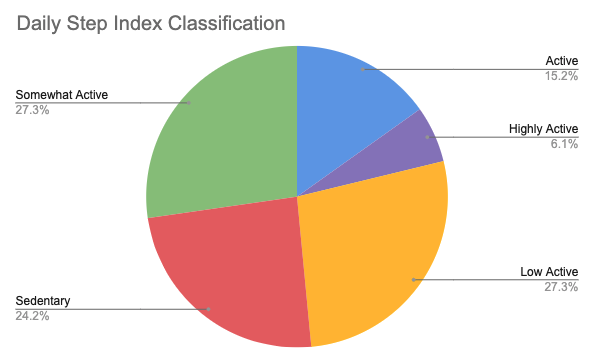

[Link to Query Result and Chart](https://docs.google.com/spreadsheets/d/e/2PACX-1vSXcX6GrUaUujoaz7JJ5VnRtkQT68mrI4_Zr9ntuJRO9j-HtmsJAlaOQAxgqDvptHKmxzJIN7fa_umT/pubhtml)

According to the index in 2011, only 21.3% (7 of 33 users) of the sample size were hitting the goal of 10,000 steps per day. 

Now, in 2025, a [recent UCLA Health article](https://www.uclahealth.org/news/article/how-many-steps-do-you-need-day-see-health-benefits) on the daily recommended steps shares that 10,000 steps a day was based on a market gimmick and scientific evidence shows that you don't need to walk 10,000 steps to reap the health benefits of walking (the number of steps recommended per day depends on your health goals and age). The article outlines the following: 
* Sedentary/Inactive (<2,000 steps/day)
* Low Active (<4,000 steps/day)
* Active (>4,000 steps/day)

Following the index above, I reran the query (below) with the new cases. 

In [ ]:
SELECT Id, round(avg(cleaned_TotalSteps), 2) avg_total_steps,
  CASE
  WHEN round(avg(cleaned_TotalSteps), 2) < 2000 THEN 'Sedentary/Inactive'
  WHEN round(avg(cleaned_TotalSteps), 2) BETWEEN 2000 AND 4000 THEN 'Low Active'
  WHEN round(avg(cleaned_TotalSteps), 2) > 4000 THEN 'Active'
  END AS total_steps_index 
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY Id
ORDER BY total_steps_index;

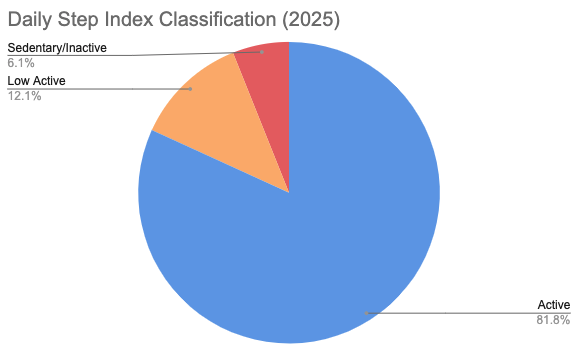

[Link to Query Results and Chart](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBdMob2pu2LqVMzOUdVxcLq0mhwPCJFnFc2P_ks0b8PyzL7DjLOjmiTrleQInMo2SSJpJ5bwsRi0Oz/pubhtml)

Following this updated index, 81.8% (27 of 33 users) of the sample size are considered active based on their average steps/day, while 6.1% (2 of 33 users) are considered sedentary. 

Since the dataset did not included demographic and personal information about each user/participant, it is hard to make a recommendation that targets the user's age. 

According to this sample, about 93% (31/33) of users are active people. 

Next, I compared the average fairly active, lightly active, very active, and sedentary minutes per day of the week. 

In [ ]:
SELECT FORMAT_DATE('%A',Formatted_ActivityDate) day_of_week,
  round(avg(cleaned_FairlyActiveMinutes),2) avg_fairlyactive_minutes,
  round(avg(cleaned_LightlyActiveMinutes), 2) avg_lightactive_minutes,
  round(avg(cleaned_VeryActiveMinutes),2) avg_veryactive_minutes,
  round(avg(cleaned_SedentaryMinutes),2) avg_sedentary_minutes
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY day_of_week;

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vQNpTCt9T1r-bXTZ-u5TZeGVCkiG2DK0OgQqBTgyWfkDdJs5YHD__Oxuhk1zSyRzYaLwq1KgSLEY30U/pubhtml) 

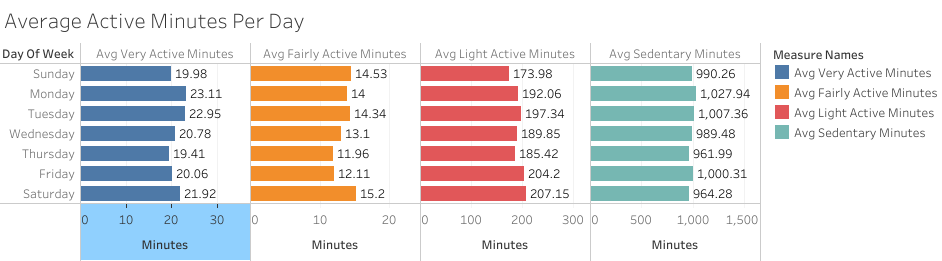

[Link to Tableau Page](https://public.tableau.com/views/MinutesofActivityperDay/Sheet2?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

From this, I learned most active minutes recorded are spent sedentary. The average minutes spent sedentary throughout the week range from 961.99 (Thursday) to 1027.94 (Monday) minutes, light active is 173.98 (Sunday) to 207.15 (Saturday) minutes, fairly active is 11.96 (Thursday) to 15.2 (Saturday) minutes, and very active is 19.41 (Thursday) to 23.11 (Monday) minutes. 

 
Since most active minutes are spent sedentary, I found what percentage sedentary minutes make up of total active minutes. 
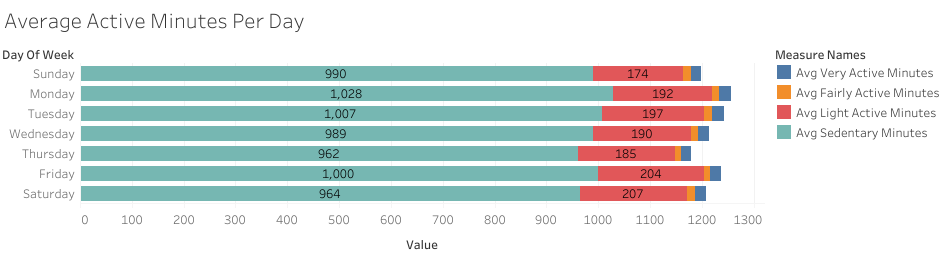

In [ ]:
SELECT 
  FORMAT_DATE('%A', formatted_activitydate) AS day_of_week,
  ROUND(
    AVG(cleaned_VeryActiveMinutes
      + cleaned_LightlyActiveMinutes
      + cleaned_FairlyActiveMinutes
      + cleaned_SedentaryMinutes)
    , 2) AS avg_total_minutes,
  ROUND(
    AVG(cleaned_SedentaryMinutes)
    /
    AVG(
      cleaned_VeryActiveMinutes
      + cleaned_LightlyActiveMinutes
      + cleaned_FairlyActiveMinutes
      + cleaned_SedentaryMinutes
    )
    * 100
  , 2) AS percent_sedentary
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY day_of_week
ORDER BY percent_sedentary;

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vRurN0cnH7sVFEfe1RtrSwE5yqRcY4A3q_4NWtuQAwn8_-0P05TnC4vmRIgKcnw-BlgcrhZ55SG2ZU4/pubhtml)

The data shows that about 80% of active minutes every day are spent sedentary. 

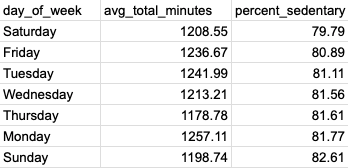

I decided to take the sedentary minutes out of the query to determine which days of the week have more recorded active minutes. I did this by averaging the very active, light active, and fairly active minutes for each day of the week and finding the sum of total average active minutes per day. 

In [ ]:
SELECT 
  formatted_activitydate, 
  FORMAT_DATE('%A', formatted_activitydate) day_of_the_week, 
  round(avg(cleaned_VeryActiveMinutes), 2) avg_veryactive_minutes, 
  round(avg(cleaned_LightlyActiveMinutes), 2) avg_lightlyactive_minutes, 
  round(avg(cleaned_FairlyActiveMinutes), 2) avg_fairlyactive_minutes, 
  round((avg(cleaned_VeryActiveMinutes) + avg(cleaned_LightlyActiveMinutes) + avg(cleaned_FairlyActiveMinutes)), 2) avg_active_minutes,
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY Formatted_ActivityDate
ORDER BY avg_active_minutes;


[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vQNpTCt9T1r-bXTZ-u5TZeGVCkiG2DK0OgQqBTgyWfkDdJs5YHD__Oxuhk1zSyRzYaLwq1KgSLEY30U/pubhtml)

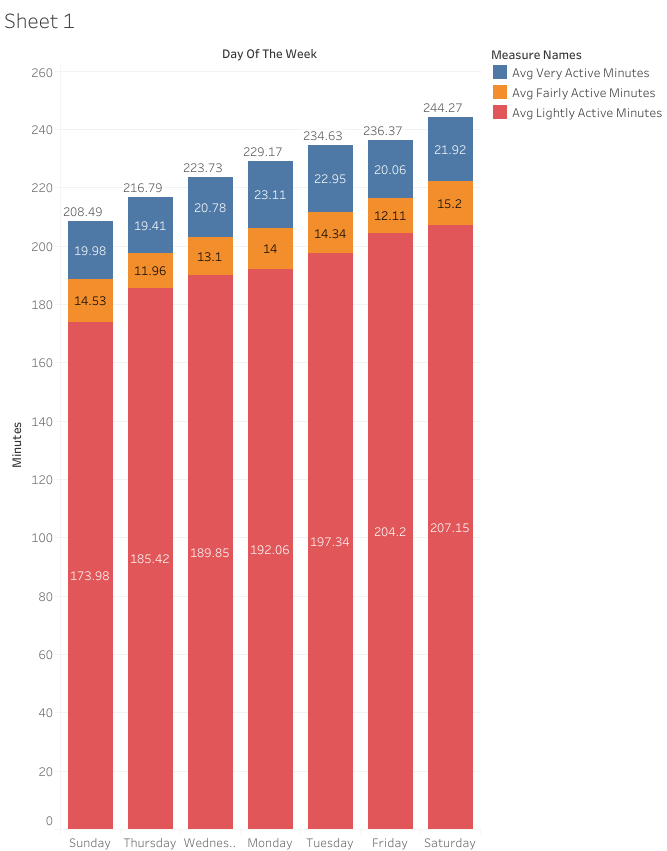

[Link to Tableau Page](https://public.tableau.com/views/AvgNonSedentaryActiveMinutesperDayoftheWeek/Sheet1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Here I found that the most average active minutes total fall on Saturdays (244.27 minutes), while the least average active minutes fall on Sundays (208.49). According to the sample data, Mondays have the highest average very active minutes (23.11 minutes). 

To conclude with the daily activity data file, I found the average calories burned, steps taken, and distance traveled per day of the week. 

In [ ]:
SELECT
  FORMAT_DATE('%A', formatted_activitydate) day_of_the_week,
  round(avg(cleaned_Calories), 2) avg_calories, 
  round(avg(cleaned_totaldistance), 2) avg_distance, 
  round(avg(cleaned_TotalSteps), 2) avg_steps
FROM `first-pro-453400.Bellabeat_data.dailyactivity`
GROUP BY day_of_the_week;


[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vQP23qZCozQaAi8Hlf2uYMHUHtPW-vW-2eUHcwjs7oCLdKzotTN6dGA01OBuW3u9GnRJ1izc_6yPQj6/pubhtml)

By using the filter option in Google Sheets, I found: 
* Tuesday and Saturday had the most calories burned
* Thursday had the least calories burned
* Saturday and Tuesday had the most distance traveled
* Sunday had the least distance traveled
* Saturday had the most steps taken
* Sunday had the least steps taken.

Overall, this is consistent with the findings in the active minutes analysis, such that Saturday has the most active minutes.
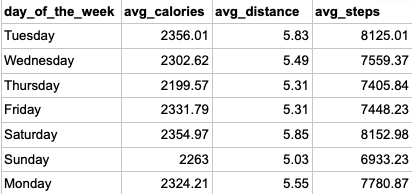

#### Hourly Calories and Hourly Steps

Next up, I looked at the hourly calories data file and started by finding the average calories burned per day of the week per Id. 

In [ ]:
SELECT 
  Id,
  FORMAT_DATE('%A', formatted_ActivityHour_date) as day_of_the_week,
  AVG(cleaned_Calories) avg_calories
FROM `first-pro-453400.Bellabeat_data.hourlycalories` 
GROUP BY Id,day_of_the_week
ORDER BY Id,
  CASE 
  WHEN day_of_the_week = 'Monday' THEN 1 
  WHEN day_of_the_week = 'Tuesday' THEN 2
  WHEN day_of_the_week = 'Wednesday' THEN 3
  WHEN day_of_the_week = 'Thursday' THEN 4
  WHEN day_of_the_week = 'Friday' THEN 5
  WHEN day_of_the_week = 'Saturday' THEN 6
  WHEN day_of_the_week = 'Sunday' THEN 7
  END;


I used a CASE WHEN expression under order by to arrange the rows by day of the week rather than alphabetical order. 

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vT6XAoDHFNoEzYs4dsnC7u8xXZyInrR4u7XhHTzZhrIIeyCYiy6WtqaEwz2JCRudtCnYv0Tz6zaP0KK/pubhtml)

Then I looked at the average calories burned per hour.  

In [ ]:
SELECT
  cleaned_ActivityHour_time, 
  round(avg(cleaned_Calories), 2) avg_calories
FROM `first-pro-453400.Bellabeat_data.hourlycalories` 
GROUP BY cleaned_ActivityHour_time
ORDER BY avg_Calories DESC;


[Link to Query Result](https://docs.google.com/spreadsheets/d/e/2PACX-1vQHh7BpcNuRU__Ce8H5CSGMbLu3vDkeHob2PYJRliDlGIGV6r8ELtlR8cLvpULKWYYOa9RuRFSNV_O_/pubhtml)

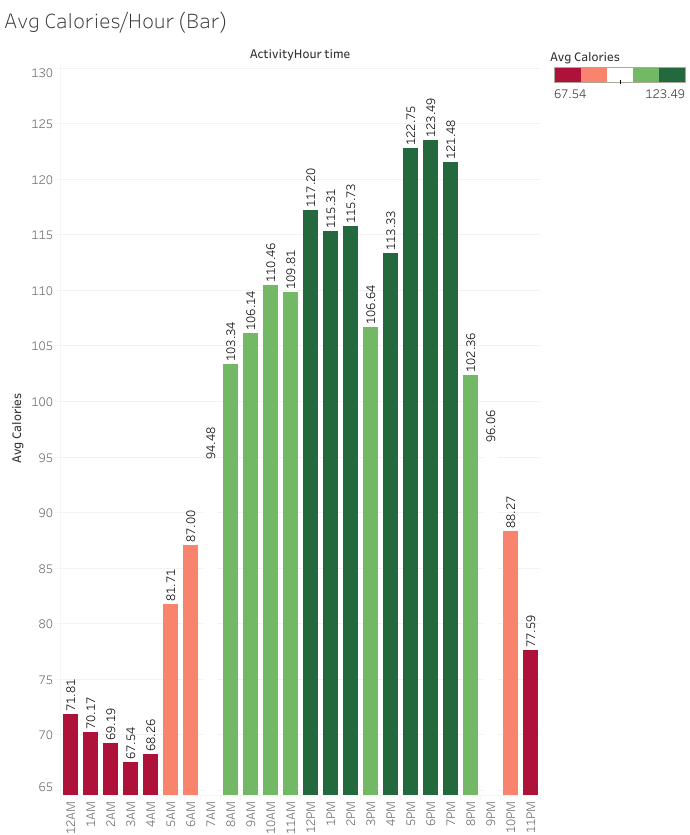

[Link to Tableau Page](https://public.tableau.com/views/AverageCaloriesperHour/Sheet1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

The data showed that there are two peaks during the day for the most average calories burned: 12-3pm and 4-8pm. Calorie burning begins to slow after 8pm and doesn't ramp back up until 5am the next day. 
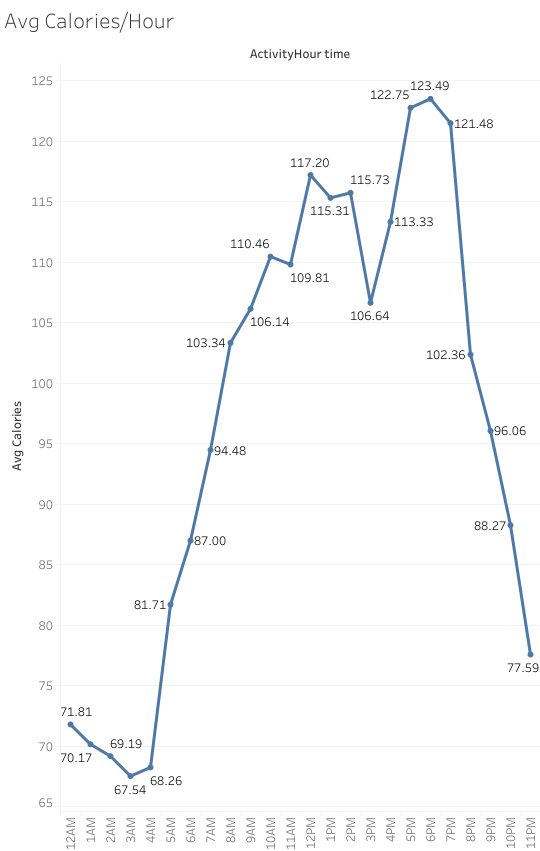

I also looked at the hourly average steps. 

In [ ]:
SELECT
  cleaned_ActivityHour_time, 
  round(avg(StepTotal), 2) avg_steps
FROM `first-pro-453400.Bellabeat_data.hourlysteps`
GROUP BY cleaned_ActivityHour_time
ORDER BY avg_steps DESC;


[Link to Query Result](https://docs.google.com/spreadsheets/d/e/2PACX-1vT-yucVHL2VQbUuhHHbLM0Rb8vIYlBrhdTRengRq27XKpG9_g3RhOoRQsZJe6uV43mfbwujHlmAU7L0/pubhtml)

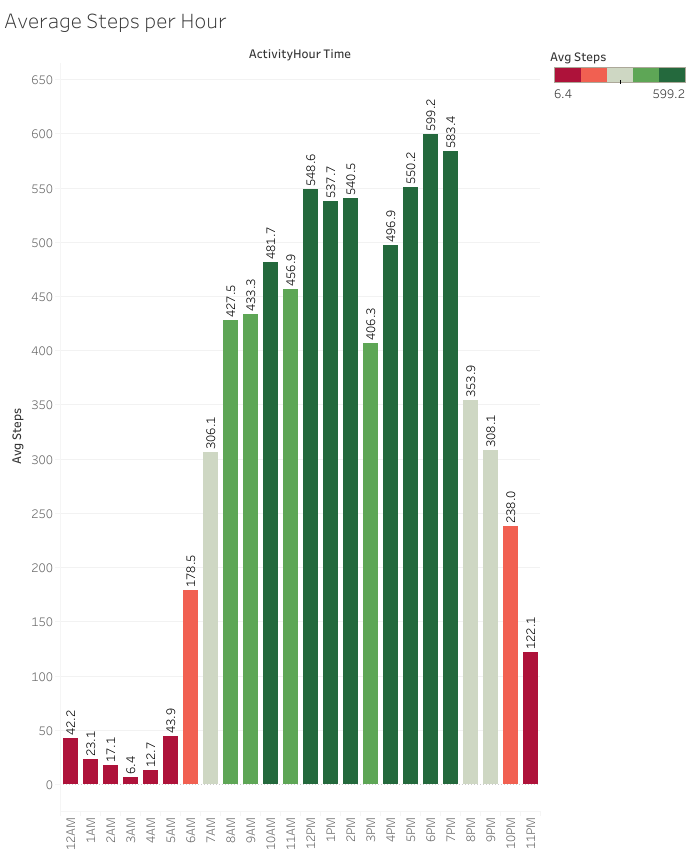

[Link to Tableau Page](https://public.tableau.com/views/BellabeatCaseStudyAverageStepsperHour/Sheet1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Similarly to the average calories per hour graph, the hourly steps data showed that there are two peaks during the day for the most average steps: 12-3pm and 4-8pm. Steps begin to slow after 8pm and don't ramp back up until 6am the next day. 

Since the graphs were so similar between the hourly calories and hourly steps, I overlayed the line graph of hourly calories and hourly steps on a daul axis. 

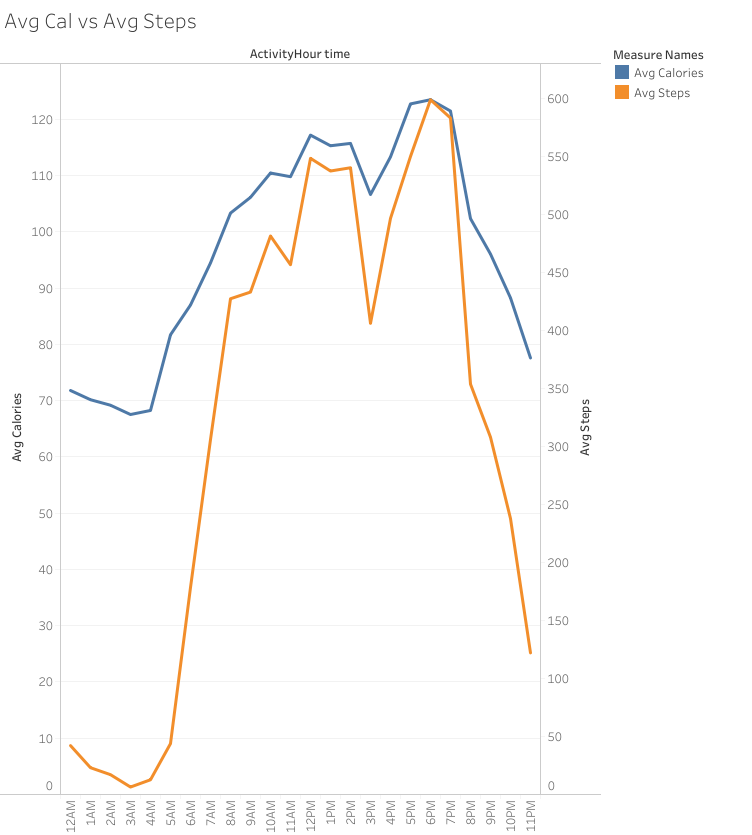

[Link to Tableau Page](https://public.tableau.com/views/AverageCaloriesandStepsPerHour/AvgCalvsAvgSteps?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Here, we see that the general trend of each line are the same. The more steps taken, the more calories burned. To confirm the correlation, I created a scatterplot of the average calories and average steps, added a trendline, and evaluated the R-squared value. 

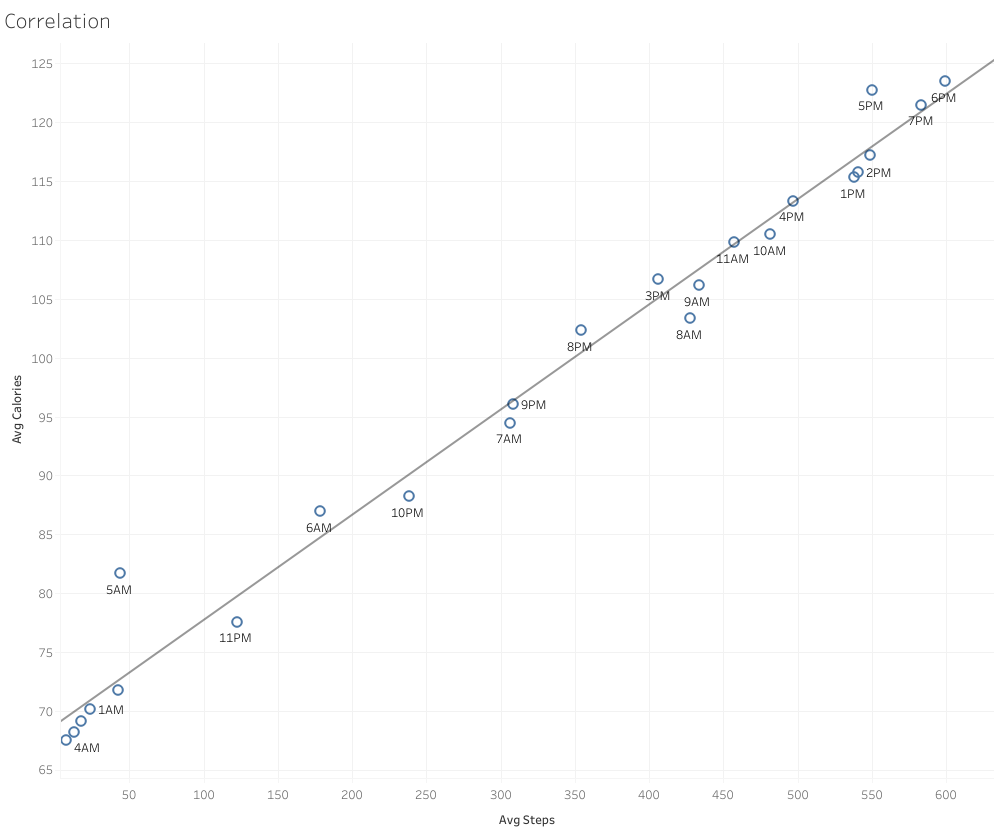

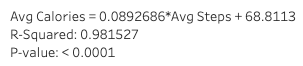

[Link to Tableau Page](https://public.tableau.com/views/AverageCaloriesandStepsPerHour/Correlation?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

The low P value indicates statistical significance, and the R-squared of 0.981527 being close to 1 indicates there’s a strong relationship between the average calories and average steps taken per hour.

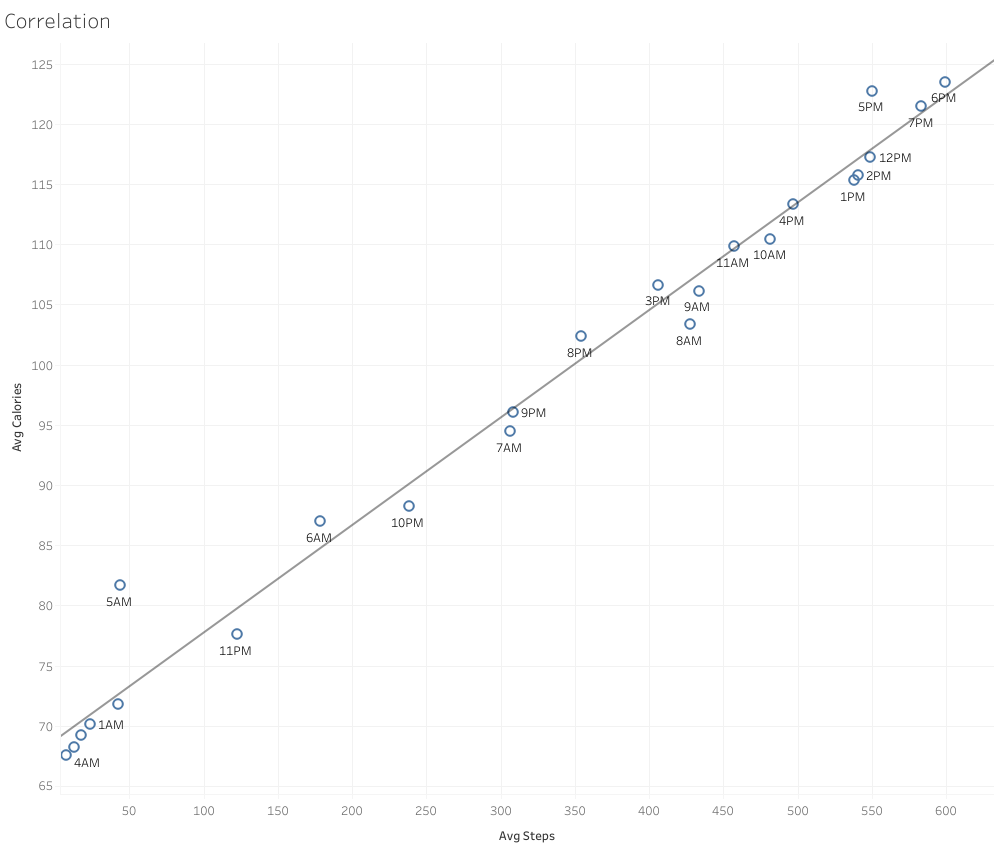

I also wanted to find the average calories burned per hour per day of the week in order to visualize the results and find times throughout the week that have the highest or lowest calories burned.

In [ ]:
SELECT
  FORMAT_DATE('%A', formatted_ActivityHour_date) day_of_the_week,
  cleaned_ActivityHour_time, 
  round(avg(cleaned_Calories), 2) avg_calories
FROM `first-pro-453400.Bellabeat_data.hourlycalories` 
GROUP BY day_of_the_week, cleaned_ActivityHour_time
ORDER BY
  CASE 
  WHEN day_of_the_week = 'Monday' THEN 1 
  WHEN day_of_the_week = 'Tuesday' THEN 2
  WHEN day_of_the_week = 'Wednesday' THEN 3
  WHEN day_of_the_week = 'Thursday' THEN 4
  WHEN day_of_the_week = 'Friday' THEN 5
  WHEN day_of_the_week = 'Saturday' THEN 6
  WHEN day_of_the_week = 'Sunday' THEN 7
  END, 
  avg_calories DESC;

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vTdjsqxwLKMTrmbk3MJctlLdHoZechlUuWjc5g55PkX92vwGN78DoeWTAxAC9NN_X38nrKm71zrD5nR/pubhtml)

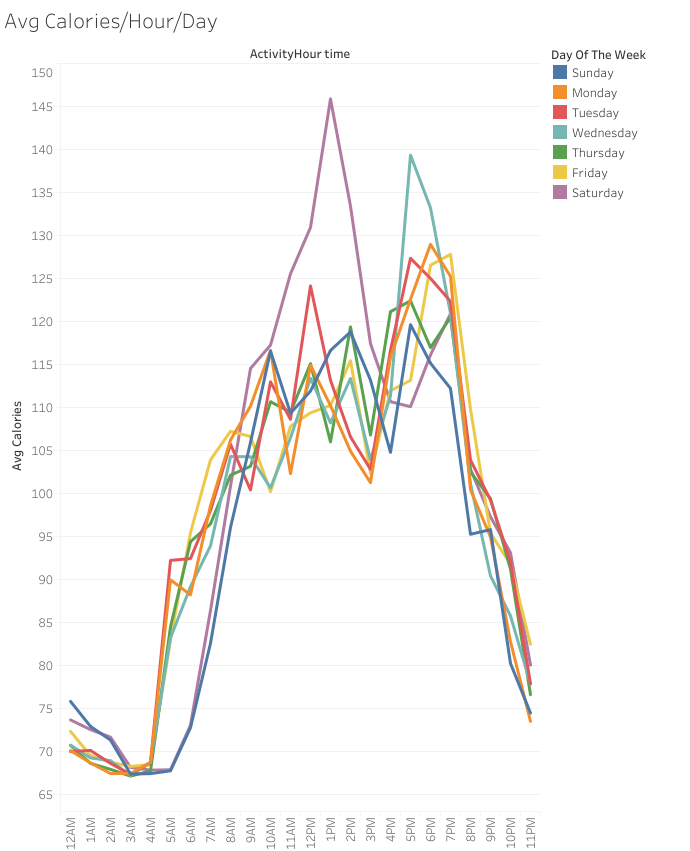

[Link to Tableau Page](https://public.tableau.com/views/AvgCaloriesHourDay/AvgCaloriesHourDay?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) (easier to hover over each peak or valley to know the exact value, day, and time)

Some noticeable points are the: 
* high calorie activity on Saturdays at 1pm
* high calorie activity on Wednesdays at 5pm
* high calorie activity at 12pm on Tuesdays compared to other weekdays
* high calorie activity at 7am on Fridays compared to all other days.

I also did the same with the average steps taken per hour per day of the week. 

In [ ]:
SELECT
  id, 
  FORMAT_DATE('%A', Formatted_ActivityHour_Date) day_of_the_week,
  round(avg(StepTotal), 2) as avg_steps
FROM `first-pro-453400.Bellabeat_data.hourlysteps`
GROUP BY id, day_of_the_week
ORDER BY Id, 
  CASE
  WHEN day_of_the_week ='Monday' THEN 1
  WHEN day_of_the_week ='Tuesday'THEN 2
  WHEN day_of_the_week ='Wednesday'THEN 3
  WHEN day_of_the_week ='Thursday' THEN 4
  WHEN day_of_the_week ='Friday' THEN 5
  WHEN day_of_the_week ='Saturday' THEN 6
  WHEN day_of_the_week ='Sunday'THEN 7
  END; 

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vTlgH1Tib-Fn0w1GuiG_sVH9tIqr0ApSZNwiO3mybGA5J1KWN0-kz_StQbhdt7ndFIm0bS0klexkZtu/pubhtml)

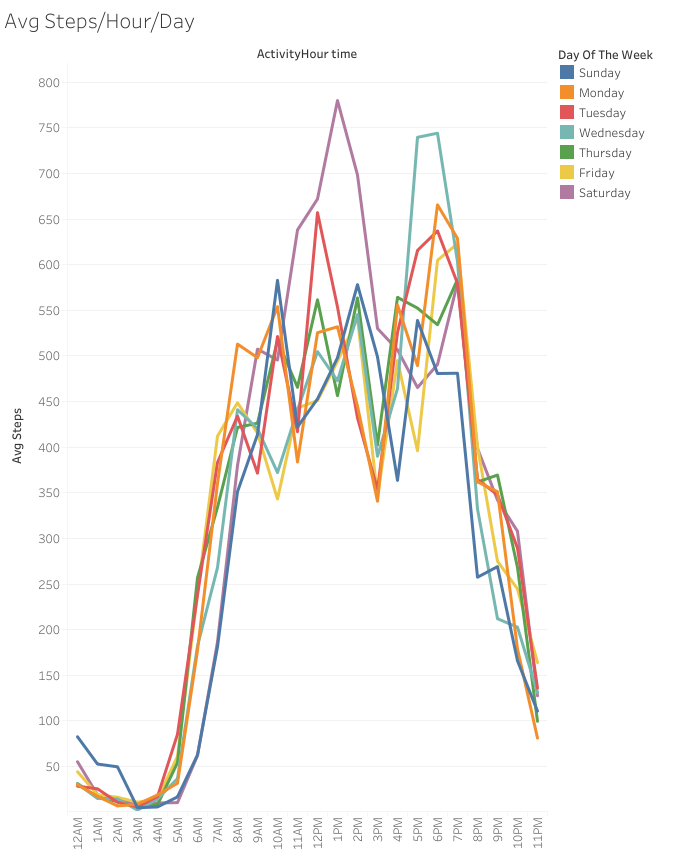

[Link to Tableau Page](https://public.tableau.com/views/AvgStepsHourDay/Sheet1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) (easier to hover over each peak or valley to know the exact value, day, and time)

Here, the noticeable peaks are:
* Saturdays at 1pm
* Wednesdays from 5-6pm
* Mondays at 8am
* Sundays at 10am
* Tuesdays at 12pm (compared to other weekdays).

I wanted to figure out what times of days can be targetted in the production and marketing strategy of the app and device for Bellabeat. 




#### Daily Sleep

Lastly, I analyzed the sleep data file by first, gathering the statistics on the average minutes and hours asleep, and the minutes spent in bed not asleep per Id. 

In [ ]:
SELECT 
  Id, 
  round(avg(cleaned_TotalMinutesAsleep), 2) avg_minutes_asleep, 
  round((avg(cleaned_TotalMinutesAsleep) / 60), 2) avg_hr_asleep,
  round(avg(cleaned_TotalTimeInBed-cleaned_TotalMinutesAsleep), 2) avg_minutes_in_bed_not_asleep
FROM `first-pro-453400.Bellabeat_data.dailysleep`
GROUP BY Id
ORDER BY avg_hr_asleep;

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vTHVH8Va4lEA56p1sjUkC5lBAwTQa91A_qh7mZ4yZFdxwkadQUvKxXRIZWC5vavaMdJv2t-To5OKUYI/pubhtml)


I also found the minimum and maximum minutes asleep per Id and what date and day of the week it occurred. 

In [ ]:
--min and max minutes asleep per Id + days those occured on 
SELECT
  Id, 
  min(cleaned_TotalMinutesAsleep) min_minutes_asleep,
  min(formatted_sleepday_date) date,
  FORMAT_DATE('%A', min(formatted_sleepday_date)) min_day_of_the_week, 
  max(cleaned_TotalMinutesAsleep) max_minutes_asleep,
  max(formatted_sleepday_date) date,
  FORMAT_DATE('%A', max(formatted_sleepday_date)) max_day_of_the_week, 
FROM `first-pro-453400.Bellabeat_data.dailysleep`
GROUP BY Id;


[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vT63wbiy5qzgaA2w40kMV9iibW3YRIaXMQxB234efiQQeHYZA13CEidNZ9MQv_WAefPcyDj6gGq5S0D/pubhtml)

I moved on by grouping data based on the day of the week, starting with the average time spent in bed not asleep per day of the week. 

In [ ]:
SELECT
  FORMAT_DATE('%A', formatted_sleepday_date) day_of_the_week, 
  round(avg(cleaned_TotalTimeInBed-cleaned_TotalMinutesAsleep), 2) avg_minutes_in_bed_not_asleep
FROM `first-pro-453400.Bellabeat_data.dailysleep`
GROUP BY day_of_the_week
ORDER BY avg_minutes_in_bed_not_asleep;


[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vSH8_mVw2z8dAFDR19xqRqd9JDtpbUk4lVcQyEJzOzdMV-Cnv5cnW6EFsWBRIDTgenFrtQxuopQX7RE/pubhtml)

Weekend nights (Friday, Saturday, Sunday) have more time spent in bed before sleeping.
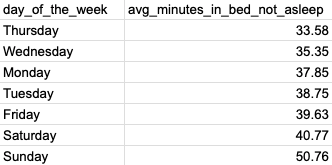

Next, I found the average minutes and hours asleep, minutes in bed not asleep, and the maximum and minimum minutes and hours asleep by day of the week. 

In [ ]:
SELECT
  FORMAT_DATE('%A', formatted_sleepday_date) day_of_the_week, 
  round(avg(cleaned_TotalMinutesAsleep), 2) avg_minutes_asleep,
  round((avg(cleaned_TotalMinutesAsleep)/60), 2) avg_hrs_asleep,
  round(avg(cleaned_TotalTimeInBed - cleaned_TotalMinutesAsleep), 2) avg_minutes_in_bed_not_asleep,
  round(max(cleaned_TotalMinutesAsleep), 2) max_minutes_asleep,
  round((max(cleaned_TotalMinutesAsleep)/60), 2) max_hrs_asleep,
  round(min(cleaned_TotalMinutesAsleep), 2) min_minutes_asleep,
  round((min(cleaned_TotalMinutesAsleep)/60), 2) min_hrs_asleep
FROM `first-pro-453400.Bellabeat_data.dailysleep`
GROUP BY day_of_the_week;

[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vTc54PHf9mmMLlnrdzq1r8EU1Rjz3XTPagaEzQ_zXD-_YNHFZxhjiKZeN63BYRw4-kOYWaws6ha1mjK/pubhtml)
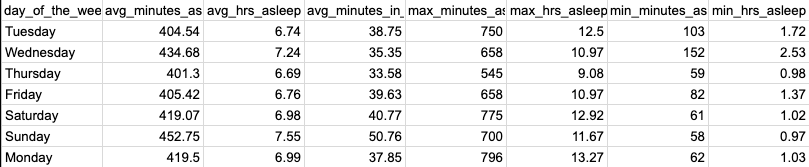


I decided to look more closely at just the average minutes asleep per day of the week

In [ ]:
SELECT
  FORMAT_DATE('%A', formatted_sleepday_date) day_of_the_week, 
  round(avg(cleaned_TotalMinutesAsleep), 2) avg_minutes_asleep
FROM `first-pro-453400.Bellabeat_data.dailysleep`
GROUP BY day_of_the_week
ORDER BY avg_minutes_asleep;


[Link to Query Results](https://docs.google.com/spreadsheets/d/e/2PACX-1vRucTU_RaVhe8HhNLQ_wZ7SdHQcx5nZa-TqbITQ6P7Xu2drZr-qDsA9MhUaslFMAUz5L0shwqv1rFCM/pubhtml)

Thursday, Tuesday, and Friday have the lowest average minutes asleep by over 10 minutes.


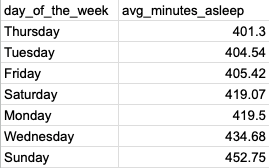

[](http://)

In a final graph, I compared the average step total per Id to the average hours asleep per Id. 

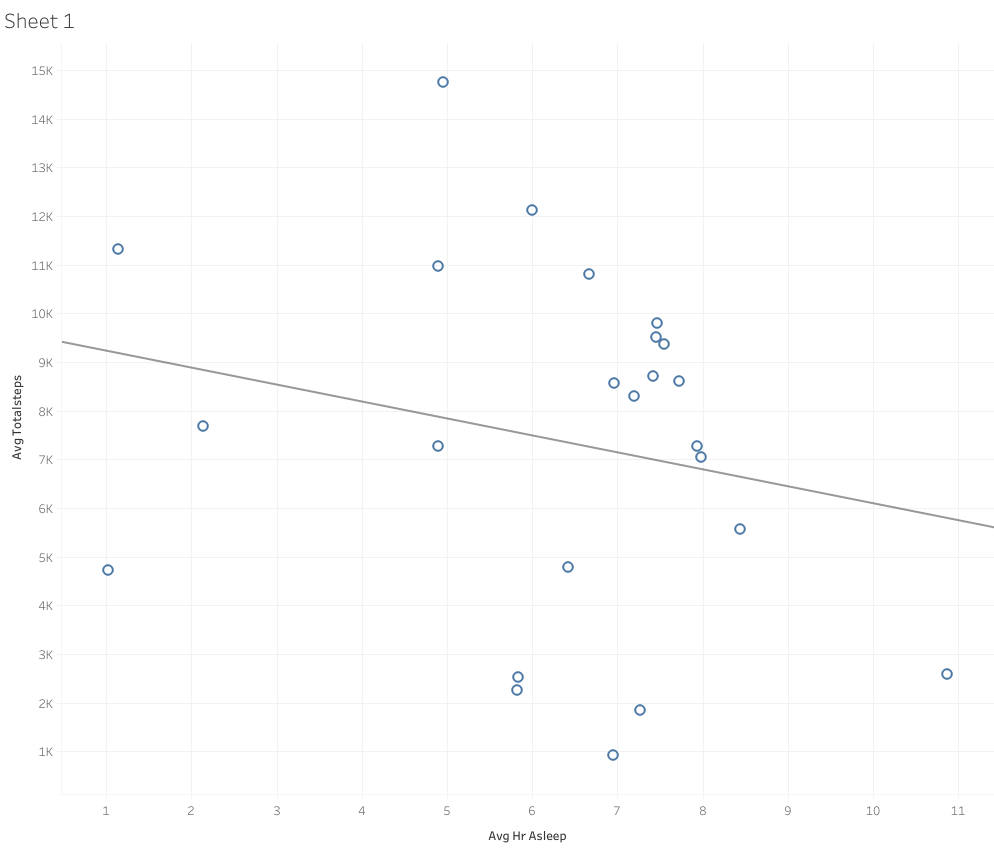

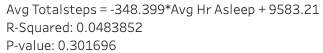

[Link to Tableau Page](https://public.tableau.com/views/AvgStepsvsAvgSleep/Sheet1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Since the p-value is greater than 0.05, it suggests that the relationship between total steps and hours asleep might be due to random chance (there’s no correlation). 

According to this graph, it showed that users in the study that: 
* slept 7-8 hours fell in the 8-10k step range
* fell in the 10k plus range slept less than 7 hours

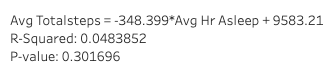

### Summary of Analysis
* About **88%** of Fitbit owners use their Fitbit **more than 21 days** of the month
  
* According to updated step index (2025), **93%** of users (31/33 in sample) are **considered active**.

* **Most active minutes** recorded are **sedentary minutes** ranging from 961.99 (Thursday) to 1027.94 (Monday) minutes.

* About **80% of each day's total active minutes** are spent **sedentary**.

* Taking sedentary minutes out of the equation, **Saturdays** averaged the **highest amount of active minutes** (244.27 minutes), while **Sunday** averaged the **least amount** (208.49 minutes).

* The **highest average steps taken and calories burned per hour** take place from **12-3pm and 4-8pm**.

* There’s a **correlation between steps taken and calories burned**.


* **Friday, Saturday, and Sunday** nights have the **highest** average of time spent in bed **not asleep**.

* **Thursday, Tuesday, and Friday** have the **lowest** average minutes **asleep** by over 10 minutes.

* There’s **no correlation between steps taken and amount of sleep**. 

## Act

The goal of this analysis was to find trends in smart-device usage data to boost product, marketing, and wellness strategies for Bellabeat. Looking at data on daily activity intensity, calories, steps, and sleep, I was able to gather insight on target areas to boost wellness in the Bellabeat community and improve Bellabeat products in their market: 
* high sedentary time every day (about 80% of total activity)
* most daily activity happens between 6am and 8pm
* peak steps taken between 12-3pm and 4-8pm
* high activity output on Saturdays compared to Sundays
* lower minutes asleep on Thursdays, Tuesdays, and Fridays

Before making my recommendations based on non-Bellabeat product data, I would recommend further analysis on Bellabeat product data, including user demographics, and survey data to find more ways to boost the company. Gathering data from a larger population can lead to stronger recommendations. 

Based on my findings, I would recommend the following: 

App Notifications: 
* daily morning notifications on Bellabeat connnected devices to put tracker on with a positive and encouraging message to reach user set goals
* periodic reminders throughout the day to get up and walk/move
* additional reminders if no activity is detected during peak hours (determined by other Bellabeat user data)
* notifications to get ready for bed and charge the device to get a certain amount of sleep

Other opportunities: 
* use incentives to boost user retention, such as discounts on memberships or other products for hitting goals
* partner with fitness studios and gyms to sell and advertise products to the target audience
* set up community Bellabeat events locally or regionally to promote fitness and making connections

Bellabeat can succeed in the smart device market by turning data-driven insights into effective product enhancements and personalized marketing strategies to empower women with healthy habits to feel like their best self!  